#Adjust data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import numpy as np
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn import metrics

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Ai data/heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
data.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [5]:
binary_vars_list=['Sex','ExerciseAngina']
def binary_map(x):
    return x.map({'Y':1,'N':0,'M':1,'F':0})
    

#applying the function to the housing variables list
data[binary_vars_list] = data[binary_vars_list].apply(binary_map)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [6]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = False)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the data

data = dummies('ChestPainType',data)
data = dummies('RestingECG',data)
data = dummies('ST_Slope',data)
data

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,0,0,0,1,0,1,0,0,1,0
914,68,1,144,193,1,141,0,3.4,1,1,0,0,0,0,1,0,0,1,0
915,57,1,130,131,0,115,1,1.2,1,1,0,0,0,0,1,0,0,1,0
916,57,0,130,236,0,174,0,0.0,1,0,1,0,0,1,0,0,0,1,0


In [7]:
scaler = MinMaxScaler()

numeric_vars = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
data[numeric_vars] = scaler.fit_transform(data[numeric_vars])

data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,0.244898,1,0.70,0.479270,0,0.788732,0,0.295455,0,0,1,0,0,0,1,0,0,0,1
1,0.428571,0,0.80,0.298507,0,0.676056,0,0.409091,1,0,0,1,0,0,1,0,0,1,0
2,0.183673,1,0.65,0.469320,0,0.267606,0,0.295455,0,0,1,0,0,0,0,1,0,0,1
3,0.408163,0,0.69,0.354892,0,0.338028,1,0.465909,1,1,0,0,0,0,1,0,0,1,0
4,0.530612,1,0.75,0.323383,0,0.436620,0,0.295455,0,0,0,1,0,0,1,0,0,0,1


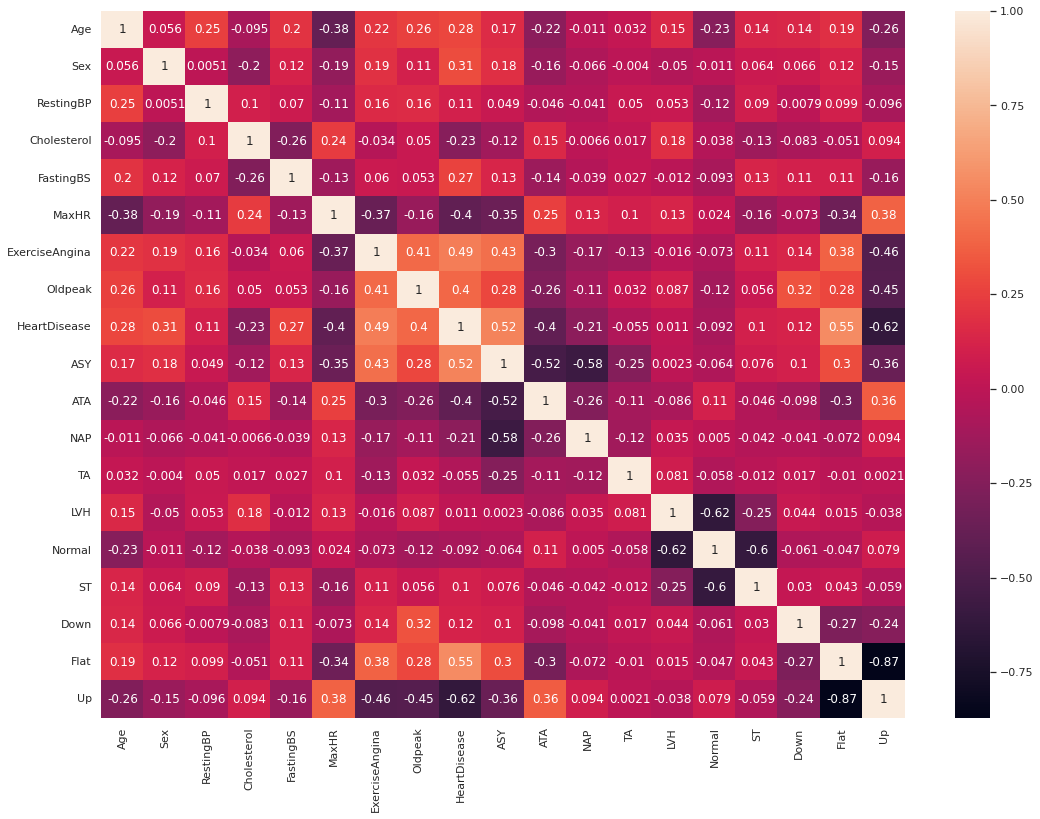

In [8]:
sns.set(style="white", color_codes=True)
sns.set(font_scale = 1.00)

plt.figure(figsize=(18,13))
sns.heatmap(data.corr(),annot=True)

In [9]:
data.drop(['TA'], axis = 1, inplace = True)
data.drop(['LVH'], axis = 1, inplace = True)
data.drop(['Normal'], axis = 1, inplace = True)
data.drop(['ST'], axis = 1, inplace = True)
data.drop(['RestingBP'], axis = 1, inplace = True)
data.drop(['Down'], axis = 1, inplace = True)

In [10]:
x = np.array(data.drop(['HeartDisease'],1))
#x
y = np.array(data['HeartDisease'])
#y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


#Train adjust

In [11]:
from sklearn import model_selection
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(x, y, stratify = y, random_state = 100,train_size = 0.7, test_size = 0.3)

In [12]:
ytrain.shape

(642,)

In [13]:
from keras.utils.np_utils import to_categorical
ytrain = to_categorical(ytrain, num_classes = None)
ytest = to_categorical(ytest, num_classes = None)
print(ytrain.shape)
print(ytrain[:10])
print(xtrain.shape)

(642, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]
(642, 12)


In [14]:
xtrain[0]

array([0.34693878, 1.        , 0.51077944, 0.        , 0.77464789,
       0.        , 0.29545455, 0.        , 1.        , 0.        ,
       0.        , 1.        ])

In [15]:
!pip install keras
!pip install Adam

In [16]:
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras import regularizers
re=regularizers.L2(0.1)
def create_model():
    model = Sequential()
    model.add(Dropout(0.1, input_dim = 12))
    model.add(Dense(6, activation = 'relu',kernel_regularizer=re))
    model.add(Dropout(0.1))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(8, activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(2, activation = 'sigmoid'))
    model.compile(optimizer = Adam(learning_rate=0.00036), loss = 'binary_crossentropy', metrics = ['accuracy']) 
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense (Dense)               (None, 6)                 78        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_1 (Dense)             (None, 10)                70        
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0

In [17]:
history=model.fit(xtrain, ytrain, validation_data=(xtest, ytest),epochs=80, batch_size=4)

Epoch 1/80
161/161 [==============================] - 2s 6ms/step - loss: 1.2780 - accuracy: 0.5592 - val_loss: 1.1775 - val_accuracy: 0.6268
Epoch 2/80
161/161 [==============================] - 1s 5ms/step - loss: 1.0942 - accuracy: 0.6480 - val_loss: 1.0173 - val_accuracy: 0.7500
Epoch 3/80
161/161 [==============================] - 1s 5ms/step - loss: 0.9529 - accuracy: 0.6900 - val_loss: 0.8969 - val_accuracy: 0.7645
Epoch 4/80
161/161 [==============================] - 1s 4ms/step - loss: 0.8585 - accuracy: 0.6963 - val_loss: 0.8039 - val_accuracy: 0.7790
Epoch 5/80
161/161 [==============================] - 1s 7ms/step - loss: 0.7637 - accuracy: 0.7508 - val_loss: 0.7262 - val_accuracy: 0.7935
Epoch 6/80
161/161 [==============================] - 1s 8ms/step - loss: 0.6867 - accuracy: 0.7757 - val_loss: 0.6600 - val_accuracy: 0.8261
Epoch 7/80
161/161 [==============================] - 2s 11ms/step - loss: 0.6438 - accuracy: 0.7757 - val_loss: 0.6049 - val_accuracy: 0.8261
Epoch

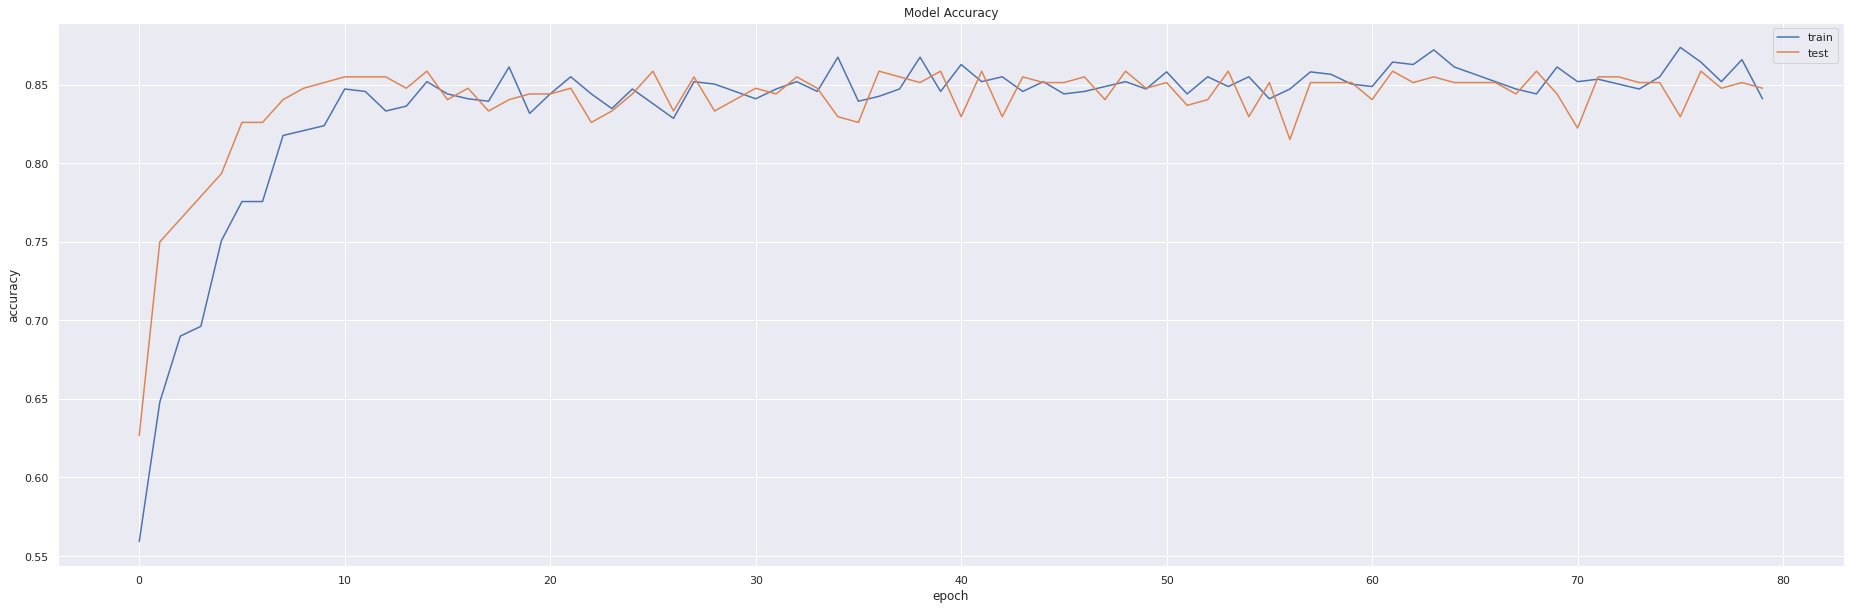

In [18]:
%matplotlib inline
# Model accuracy
plt.figure(figsize=(32,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

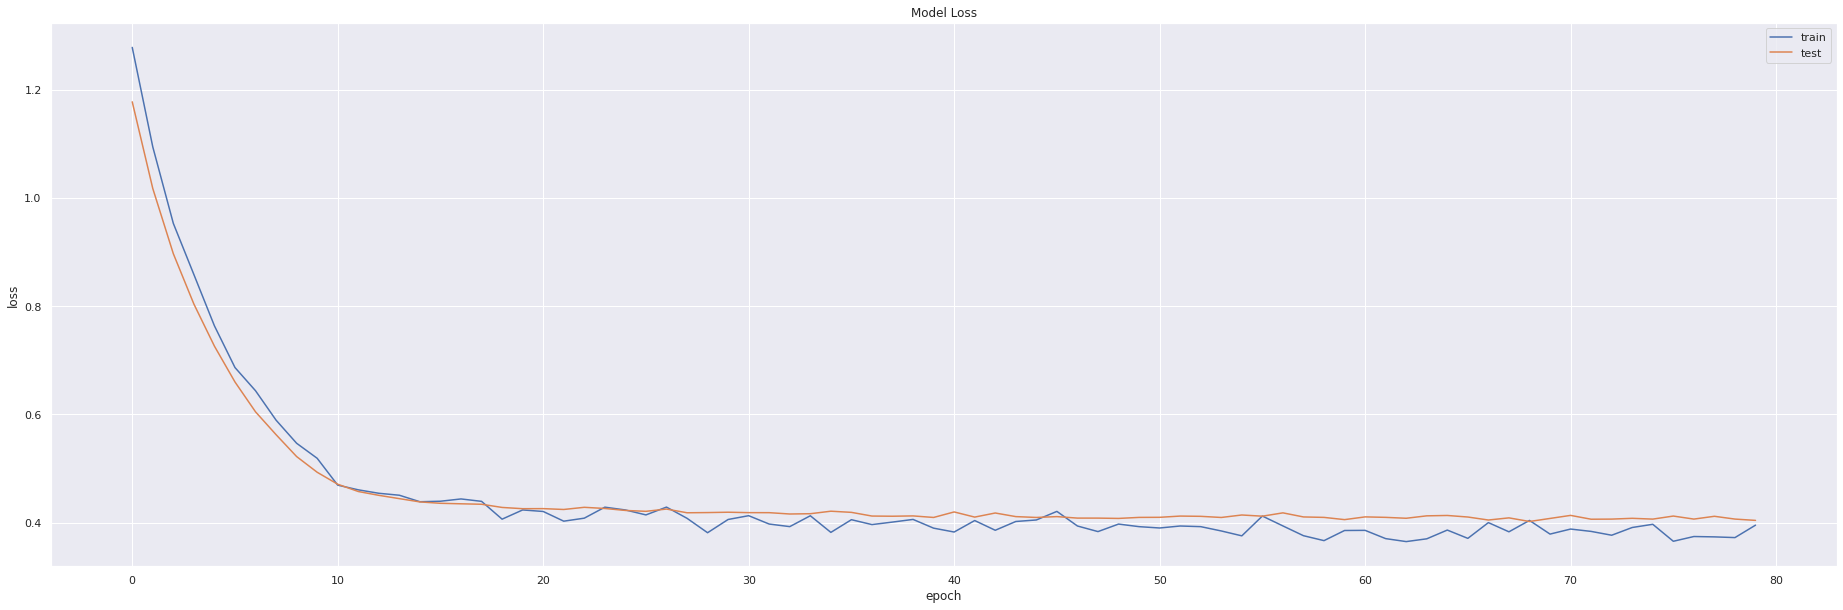

In [19]:
# Model Losss
plt.figure(figsize=(32,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [66]:
from sklearn.metrics import classification_report
y_pred = model.predict(xtest,batch_size=None)
y_pred_train = model.predict(xtrain,batch_size=None)
ypredbool = np.argmax(y_pred, axis=1)
ypredbool = to_categorical(ypredbool, num_classes = None)
ypredbooltr = np.argmax(y_pred_train, axis=1)
ypredbooltr = to_categorical(ypredbooltr, num_classes = None)
MLP_f1_score = metrics.f1_score(ytest, ypredbool, average=None)
MLP_acc_score=metrics.accuracy_score(ytest, ypredbool)
MLP_acc_score_train=metrics.accuracy_score(ytrain, ypredbooltr)
MLP_recall_score=metrics.recall_score(ytest, ypredbool,average=None)
print('Test acc',MLP_acc_score)
print('Train acc',MLP_acc_score_train)
print('F1 score:',MLP_f1_score)
print('Recall score:',MLP_recall_score)
print(classification_report(ytest, ypredbool))

Test acc 0.8514492753623188
Train acc 0.883177570093458
F1 score: [0.82987552 0.8681672 ]
Recall score: [0.81300813 0.88235294]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       123
           1       0.85      0.88      0.87       153

   micro avg       0.85      0.85      0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276
 samples avg       0.85      0.85      0.85       276



#Only mlp

In [21]:
#re=regularizers.L2(0.0005)
def create_model():
    model0 = Sequential()
    model0.add(Dense(6,input_dim=12, activation = 'relu'))
    #model0.add(Dropout(0.005))
    model0.add(Dense(10, activation = 'relu'))
    #model0.add(Dropout(0.005))
    model0.add(Dense(8, activation = 'relu'))
    #model0.add(Dropout(0.005))
    model0.add(Dense(2, activation = 'sigmoid'))
    model0.compile(optimizer = Adam(learning_rate=0.00036), loss = 'binary_crossentropy', metrics = ['accuracy']) 
    return model0

model0 = create_model()

print(model0.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6)                 78        
                                                                 
 dense_5 (Dense)             (None, 10)                70        
                                                                 
 dense_6 (Dense)             (None, 8)                 88        
                                                                 
 dense_7 (Dense)             (None, 2)                 18        
                                                                 
Total params: 254
Trainable params: 254
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
history0=model.fit(xtrain, ytrain, validation_data=(xtest, ytest),epochs=80, batch_size=4)

Epoch 1/80
161/161 [==============================] - 1s 5ms/step - loss: 0.3775 - accuracy: 0.8676 - val_loss: 0.4060 - val_accuracy: 0.8551
Epoch 2/80
161/161 [==============================] - 1s 4ms/step - loss: 0.3579 - accuracy: 0.8598 - val_loss: 0.4050 - val_accuracy: 0.8514
Epoch 3/80
161/161 [==============================] - 1s 5ms/step - loss: 0.3836 - accuracy: 0.8598 - val_loss: 0.4049 - val_accuracy: 0.8478
Epoch 4/80
161/161 [==============================] - 1s 4ms/step - loss: 0.3751 - accuracy: 0.8723 - val_loss: 0.4147 - val_accuracy: 0.8297
Epoch 5/80
161/161 [==============================] - 1s 4ms/step - loss: 0.3436 - accuracy: 0.8707 - val_loss: 0.4110 - val_accuracy: 0.8406
Epoch 6/80
161/161 [==============================] - 1s 4ms/step - loss: 0.3639 - accuracy: 0.8598 - val_loss: 0.4096 - val_accuracy: 0.8442
Epoch 7/80
161/161 [==============================] - 1s 4ms/step - loss: 0.3857 - accuracy: 0.8520 - val_loss: 0.4043 - val_accuracy: 0.8551
Epoch 

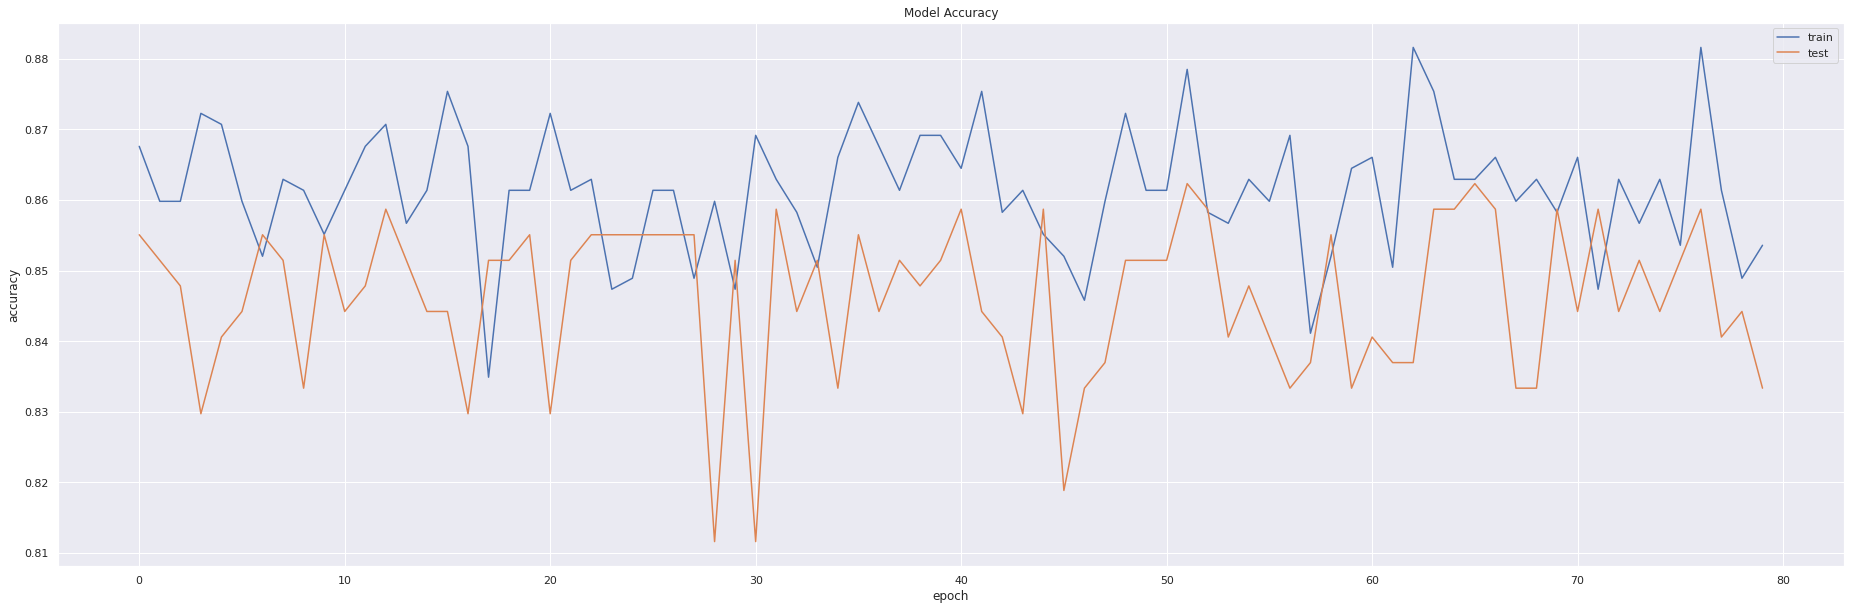

In [23]:
%matplotlib inline
# Model accuracy
plt.figure(figsize=(32,10))
plt.plot(history0.history['accuracy'])
plt.plot(history0.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

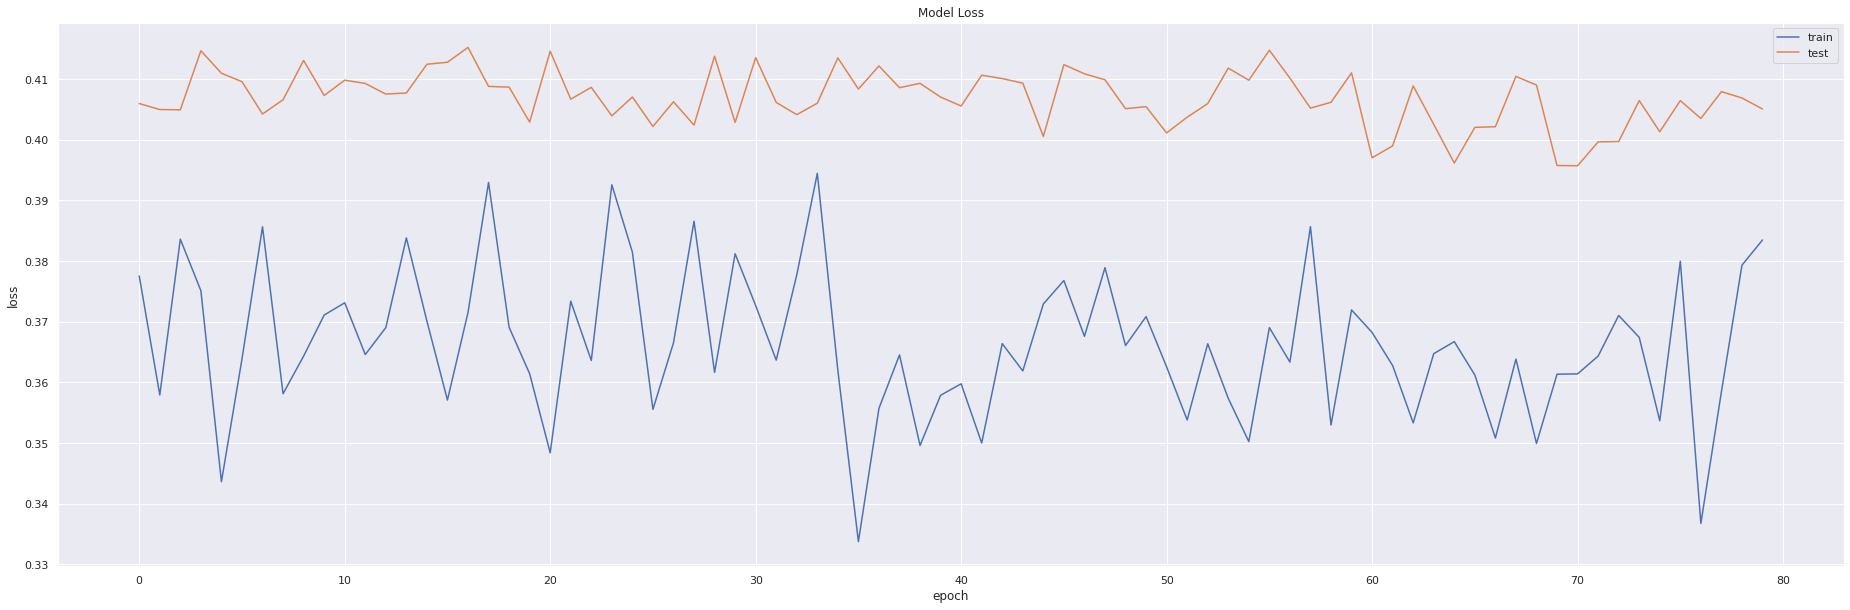

In [24]:
# Model Losss
plt.figure(figsize=(32,10))
plt.plot(history0.history['loss'])
plt.plot(history0.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [67]:
from sklearn.metrics import classification_report
y_pred = model0.predict(xtest,batch_size=None)
y_pred_train = model0.predict(xtrain,batch_size=None)
ypredbool = np.argmax(y_pred, axis=1)
ypredbool = to_categorical(ypredbool, num_classes = None)
ypredbooltr = np.argmax(y_pred_train, axis=1)
ypredbooltr = to_categorical(ypredbooltr, num_classes = None)
MLP0_f1_score = metrics.f1_score(ytest, ypredbool, average=None)
MLP0_acc_score=metrics.accuracy_score(ytest, ypredbool)
MLP0_acc_score_train=metrics.accuracy_score(ytrain, ypredbooltr)
MLP0_recall_score = metrics.recall_score(ytest, ypredbool, average=None)
print('Test acc',MLP0_acc_score)
print('Train acc',MLP0_acc_score_train)
print('F1 score:',MLP0_f1_score)
print('Recall score:',MLP0_recall_score)
print(classification_report(ytest, ypredbool))

Test acc 0.5905797101449275
Train acc 0.5311526479750779
F1 score: [0.19858156 0.72506083]
Recall score: [0.11382114 0.97385621]
              precision    recall  f1-score   support

           0       0.78      0.11      0.20       123
           1       0.58      0.97      0.73       153

   micro avg       0.59      0.59      0.59       276
   macro avg       0.68      0.54      0.46       276
weighted avg       0.67      0.59      0.49       276
 samples avg       0.59      0.59      0.59       276



#With only regulizer l2

In [26]:
def create_model():
    model1 = Sequential()
    model1.add(Dropout(0.1, input_dim = 12))
    model.add(Dense(6, activation = 'relu',kernel_regularizer=re))
    #model.add(Dropout(0.1))
    model1.add(Dense(10, activation = 'relu'))
    #model.add(Dropout(0.1))
    model1.add(Dense(8, activation = 'relu'))
    #model.add(Dropout(0.1))
    model1.add(Dense(2, activation = 'sigmoid'))
    model1.compile(optimizer = Adam(learning_rate=0.00036), loss = 'binary_crossentropy', metrics = ['accuracy']) 
    return model1

model1= create_model()

print(model1.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_4 (Dropout)         (None, 12)                0         
                                                                 
 dense_9 (Dense)             (None, 10)                130       
                                                                 
 dense_10 (Dense)            (None, 8)                 88        
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 236
Trainable params: 236
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
history1=model.fit(xtrain, ytrain, validation_data=(xtest, ytest),epochs=80, batch_size=4)

Epoch 1/80
161/161 [==============================] - 1s 4ms/step - loss: 0.3494 - accuracy: 0.8707 - val_loss: 0.4082 - val_accuracy: 0.8370
Epoch 2/80
161/161 [==============================] - 1s 5ms/step - loss: 0.3486 - accuracy: 0.8645 - val_loss: 0.4053 - val_accuracy: 0.8478
Epoch 3/80
161/161 [==============================] - 1s 4ms/step - loss: 0.3688 - accuracy: 0.8474 - val_loss: 0.4027 - val_accuracy: 0.8587
Epoch 4/80
161/161 [==============================] - 1s 4ms/step - loss: 0.3736 - accuracy: 0.8629 - val_loss: 0.4050 - val_accuracy: 0.8551
Epoch 5/80
161/161 [==============================] - 1s 4ms/step - loss: 0.3599 - accuracy: 0.8614 - val_loss: 0.4036 - val_accuracy: 0.8478
Epoch 6/80
161/161 [==============================] - 1s 4ms/step - loss: 0.3843 - accuracy: 0.8551 - val_loss: 0.4021 - val_accuracy: 0.8551
Epoch 7/80
161/161 [==============================] - 1s 4ms/step - loss: 0.3618 - accuracy: 0.8660 - val_loss: 0.4103 - val_accuracy: 0.8333
Epoch 

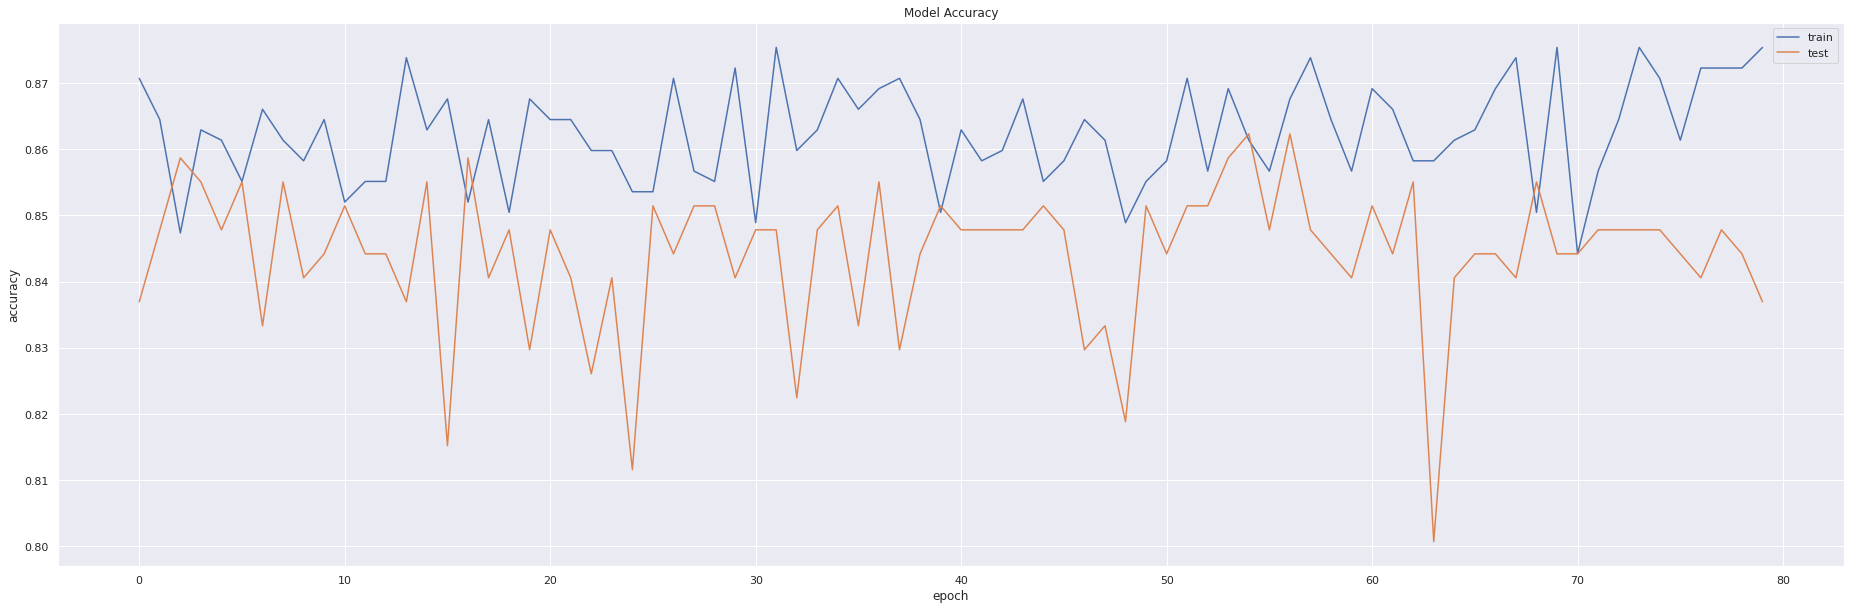

In [28]:
%matplotlib inline
# Model accuracy
plt.figure(figsize=(32,10))
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

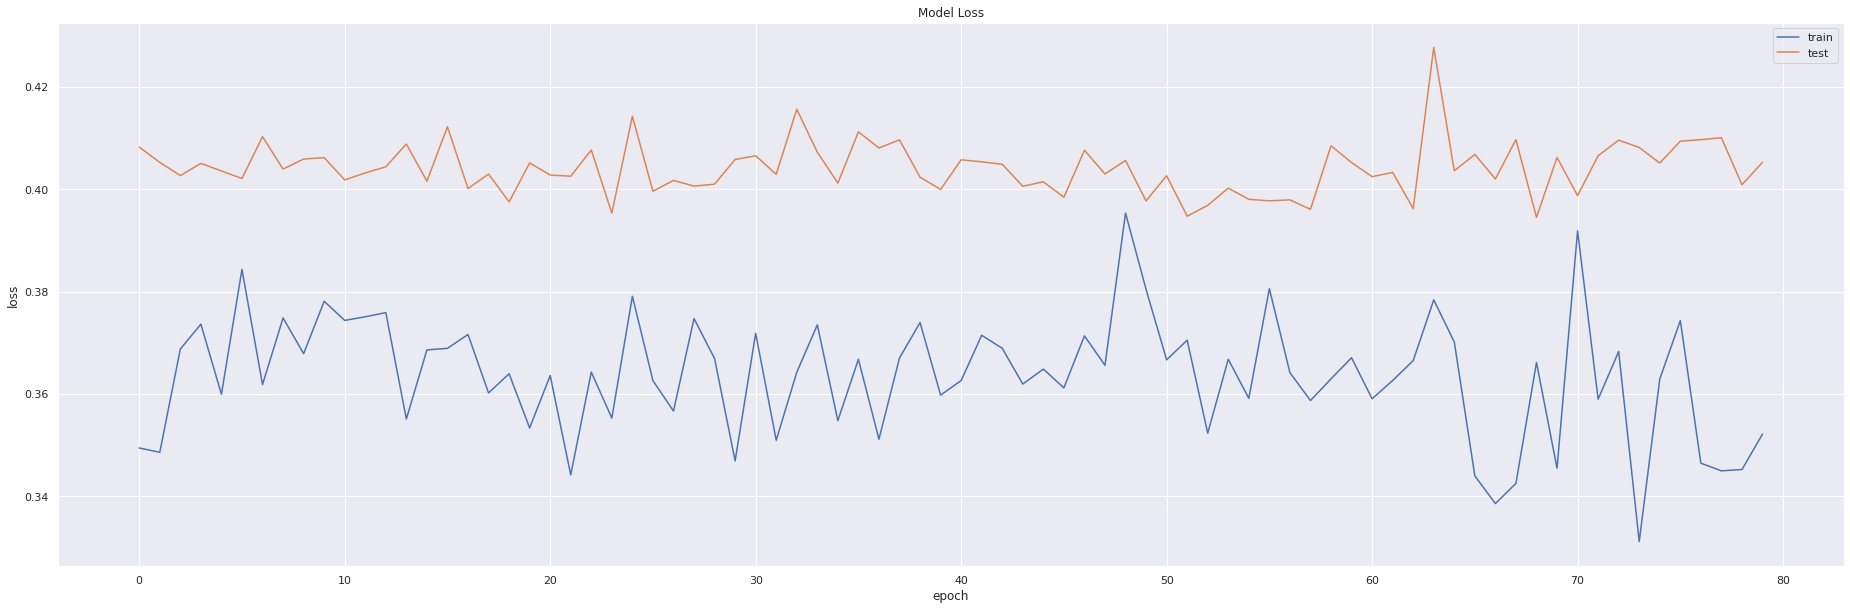

In [29]:
# Model Losss
plt.figure(figsize=(32,10))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [70]:
from sklearn.metrics import classification_report
y_pred = model.predict(xtest,batch_size=None)
y_pred_train = model.predict(xtrain,batch_size=None)
ypredbool = np.argmax(y_pred, axis=1)
ypredbool = to_categorical(ypredbool, num_classes = None)
ypredbooltr = np.argmax(y_pred_train, axis=1)
ypredbooltr = to_categorical(ypredbooltr, num_classes = None)
MLPl2_f1_score = metrics.f1_score(ytest, ypredbool, average=None)
MLPl2_acc_score=metrics.accuracy_score(ytest, ypredbool)
MLPl2_acc_score_train=metrics.accuracy_score(ytrain, ypredbooltr)
MLPl2_recall_score = metrics.recall_score(ytest, ypredbool, average=None)
print('Test acc',MLPl2_acc_score)
print('Train acc',MLPl2_acc_score_train)
print('F1 score',MLPl2_f1_score)
print('Recall score',MLPl2_recall_score)
print(classification_report(ytest, ypredbool))

Test acc 0.8514492753623188
Train acc 0.883177570093458
F1 score [0.82987552 0.8681672 ]
Recall score [0.81300813 0.88235294]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       123
           1       0.85      0.88      0.87       153

   micro avg       0.85      0.85      0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276
 samples avg       0.85      0.85      0.85       276



#With only dropout

In [31]:
def create_model():
    model2 = Sequential()
    model2.add(Dropout(0.1, input_dim = 12))
    model2.add(Dense(6, activation = 'relu'))
    model2.add(Dropout(0.1))
    model2.add(Dense(10, activation = 'relu'))
    model2.add(Dropout(0.1))
    model2.add(Dense(8, activation = 'relu'))
    model2.add(Dropout(0.1))
    model2.add(Dense(2, activation = 'sigmoid'))
    model2.compile(optimizer = Adam(learning_rate=0.00036), loss = 'binary_crossentropy', metrics = ['accuracy']) 
    return model2

model2= create_model()

print(model2.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_5 (Dropout)         (None, 12)                0         
                                                                 
 dense_12 (Dense)            (None, 6)                 78        
                                                                 
 dropout_6 (Dropout)         (None, 6)                 0         
                                                                 
 dense_13 (Dense)            (None, 10)                70        
                                                                 
 dropout_7 (Dropout)         (None, 10)                0         
                                                                 
 dense_14 (Dense)            (None, 8)                 88        
                                                                 
 dropout_8 (Dropout)         (None, 8)                

In [32]:
history2=model.fit(xtrain, ytrain, validation_data=(xtest, ytest),epochs=80, batch_size=4)

Epoch 1/80
161/161 [==============================] - 1s 4ms/step - loss: 0.3454 - accuracy: 0.8614 - val_loss: 0.4135 - val_accuracy: 0.8225
Epoch 2/80
161/161 [==============================] - 1s 4ms/step - loss: 0.3578 - accuracy: 0.8614 - val_loss: 0.4055 - val_accuracy: 0.8297
Epoch 3/80
161/161 [==============================] - 1s 5ms/step - loss: 0.3445 - accuracy: 0.8707 - val_loss: 0.4060 - val_accuracy: 0.8406
Epoch 4/80
161/161 [==============================] - 1s 5ms/step - loss: 0.3525 - accuracy: 0.8660 - val_loss: 0.4049 - val_accuracy: 0.8188
Epoch 5/80
161/161 [==============================] - 1s 4ms/step - loss: 0.3657 - accuracy: 0.8551 - val_loss: 0.3976 - val_accuracy: 0.8514
Epoch 6/80
161/161 [==============================] - 1s 4ms/step - loss: 0.3726 - accuracy: 0.8520 - val_loss: 0.3922 - val_accuracy: 0.8587
Epoch 7/80
161/161 [==============================] - 1s 4ms/step - loss: 0.3747 - accuracy: 0.8333 - val_loss: 0.3984 - val_accuracy: 0.8478
Epoch 

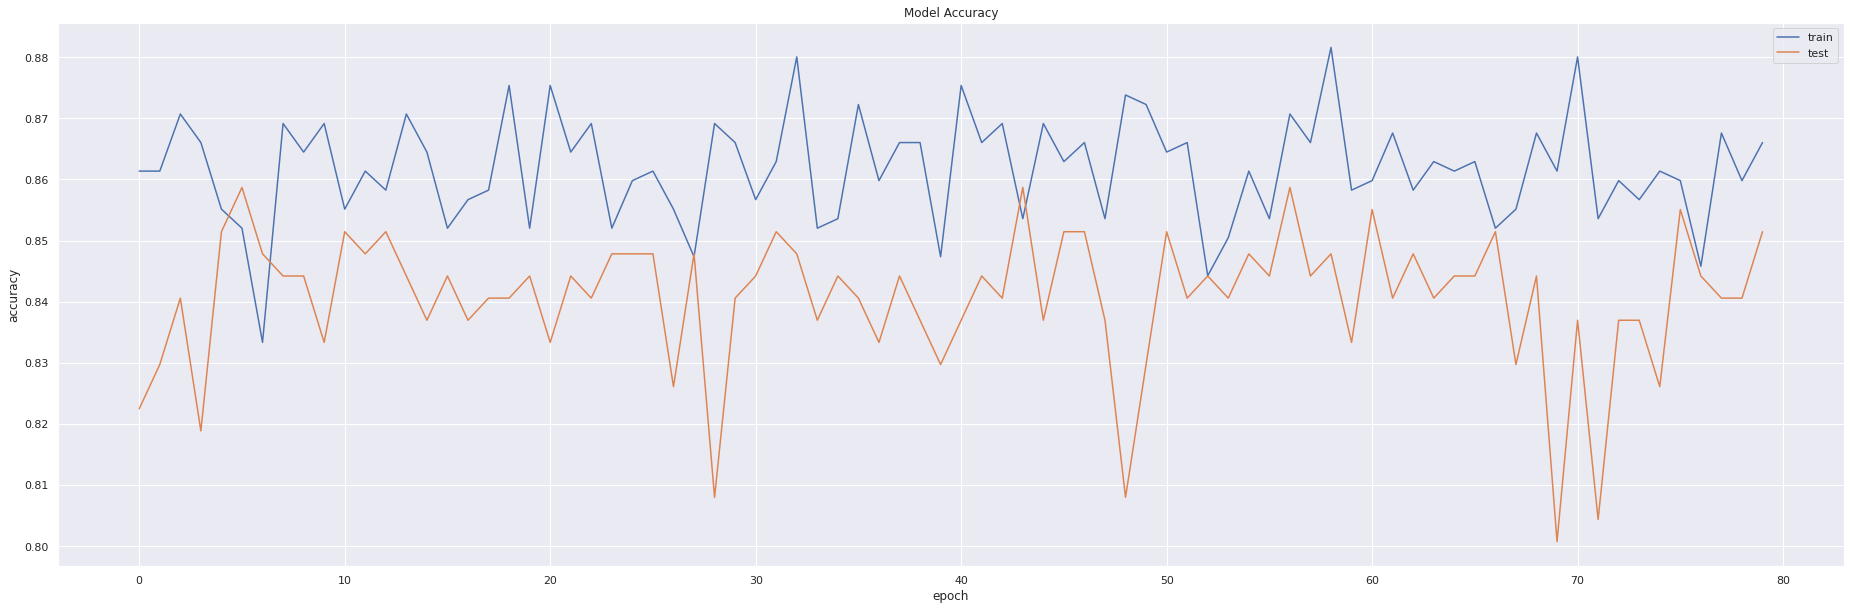

In [33]:
%matplotlib inline
# Model accuracy
plt.figure(figsize=(32,10))
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

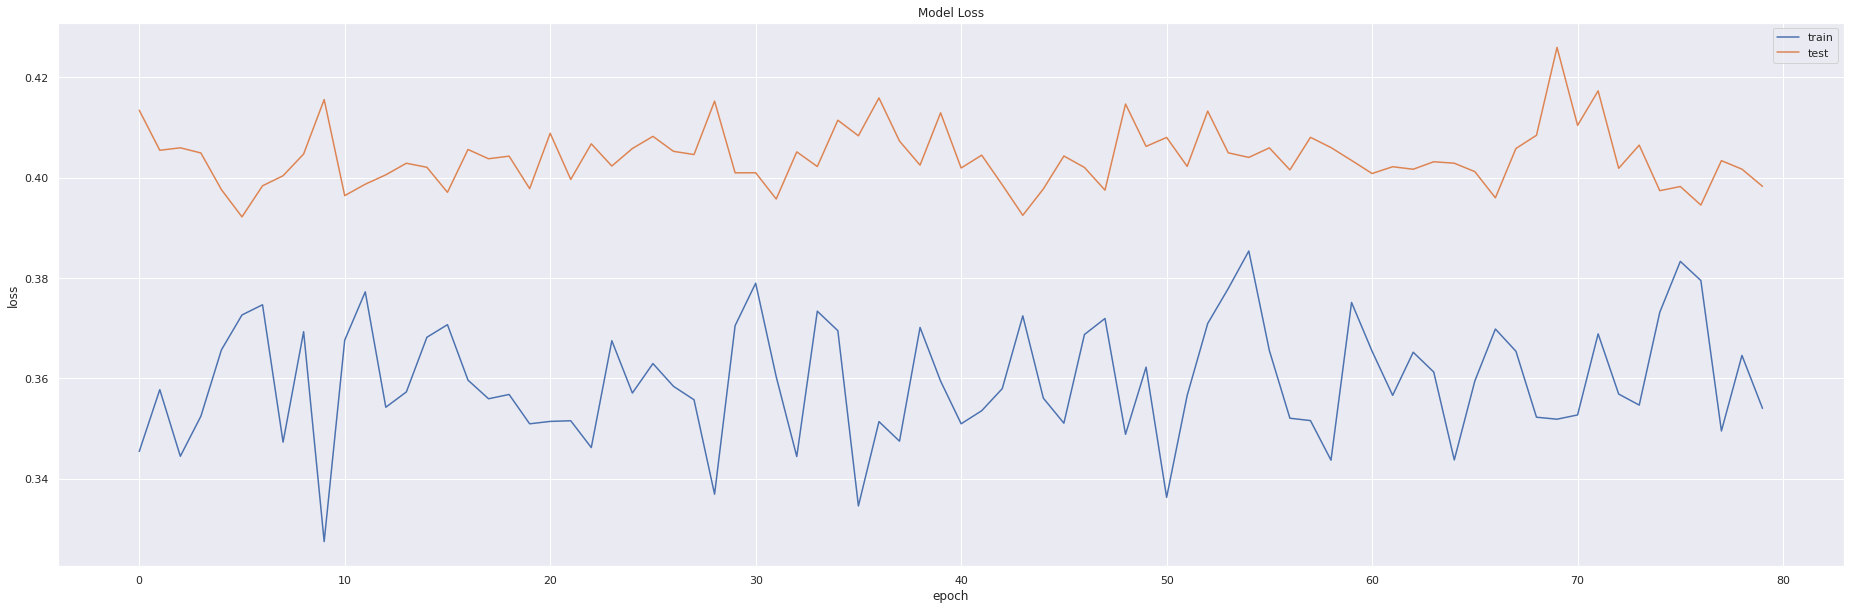

In [34]:
# Model Losss
plt.figure(figsize=(32,10))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [69]:
from sklearn.metrics import classification_report
y_pred = model.predict(xtest,batch_size=None)
y_pred_train = model.predict(xtrain,batch_size=None)
ypredbool = np.argmax(y_pred, axis=1)
ypredbool = to_categorical(ypredbool, num_classes = None)
ypredbooltr = np.argmax(y_pred_train, axis=1)
ypredbooltr = to_categorical(ypredbooltr, num_classes = None)
MLPd_f1_score = metrics.f1_score(ytest, ypredbool, average=None)
MLPd_acc_score=metrics.accuracy_score(ytest, ypredbool)
MLPd_acc_score_train=metrics.accuracy_score(ytrain, ypredbooltr)
MLPd_recall_score = metrics.recall_score(ytest, ypredbool, average=None)
print('Test acc',MLPd_acc_score)
print('Train acc',MLPd_acc_score_train)
print('F1 score',MLPd_f1_score)
print('Recall score',MLPd_recall_score)
print(classification_report(ytest, ypredbool))

Test acc 0.8514492753623188
Train acc 0.883177570093458
F1 score [0.82987552 0.8681672 ]
Recall score [0.81300813 0.88235294]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       123
           1       0.85      0.88      0.87       153

   micro avg       0.85      0.85      0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276
 samples avg       0.85      0.85      0.85       276



#Data adjust for other method

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [38]:
data1 = pd.read_csv('/content/drive/MyDrive/Ai data/heart.csv')
data1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [39]:
data1.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [40]:
binary_vars_list=['Sex','ExerciseAngina']
def binary_map(x):
    return x.map({'Y':1,'N':0,'M':1,'F':0})
    

#applying the function to the housing variables list
data1[binary_vars_list] = data1[binary_vars_list].apply(binary_map)
data1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [41]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = False)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the data

data1 = dummies('ChestPainType',data1)
data1 = dummies('RestingECG',data1)
data1= dummies('ST_Slope',data1)
data1

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,0,0,0,1,0,1,0,0,1,0
914,68,1,144,193,1,141,0,3.4,1,1,0,0,0,0,1,0,0,1,0
915,57,1,130,131,0,115,1,1.2,1,1,0,0,0,0,1,0,0,1,0
916,57,0,130,236,0,174,0,0.0,1,0,1,0,0,1,0,0,0,1,0


In [42]:
scaler = MinMaxScaler()

numeric_vars = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
data1[numeric_vars] = scaler.fit_transform(data1[numeric_vars])

data1.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ASY,ATA,NAP,TA,LVH,Normal,ST,Down,Flat,Up
0,0.244898,1,0.70,0.479270,0,0.788732,0,0.295455,0,0,1,0,0,0,1,0,0,0,1
1,0.428571,0,0.80,0.298507,0,0.676056,0,0.409091,1,0,0,1,0,0,1,0,0,1,0
2,0.183673,1,0.65,0.469320,0,0.267606,0,0.295455,0,0,1,0,0,0,0,1,0,0,1
3,0.408163,0,0.69,0.354892,0,0.338028,1,0.465909,1,1,0,0,0,0,1,0,0,1,0
4,0.530612,1,0.75,0.323383,0,0.436620,0,0.295455,0,0,0,1,0,0,1,0,0,0,1


In [43]:
data1.drop(['TA'], axis = 1, inplace = True)
data1.drop(['LVH'], axis = 1, inplace = True)
data1.drop(['Normal'], axis = 1, inplace = True)
data1.drop(['ST'], axis = 1, inplace = True)
data1.drop(['RestingBP'], axis = 1, inplace = True)
data1.drop(['Down'], axis = 1, inplace = True)

In [44]:
x1 = data1.drop('HeartDisease',axis=1)
#x
y1 = data1['HeartDisease']
#y
print(x1.shape)
print(y1.shape)

(918, 12)
(918,)


#other mothod

In [45]:
xtrain1, xtest1, ytrain1, ytest1 = model_selection.train_test_split(x1, y1, stratify = y, random_state = 100,train_size = 0.7, test_size = 0.3)

In [80]:
#INSTANTIATE LOGISTIC REGRESSION
logreg = LogisticRegression()
logreg.fit(xtrain1, ytrain1)
y_pred_log = logreg.predict(xtest1)
y_pred_log_train = logreg.predict(xtrain1)
lr_acc_score=metrics.accuracy_score(ytest1, y_pred_log)
lr_recall_score=metrics.recall_score(ytest1, y_pred_log, average=None)
lr_acc_score_train=metrics.accuracy_score(ytrain1, y_pred_log_train)
lr_f1_score=metrics.f1_score(ytest1, y_pred_log, average=None)
lr_conf_matrix = confusion_matrix(ytest1, y_pred_log)
# checking accuracy
print('Train Accuracy score: ',lr_acc_score_train)
print('Test Accuracy score: ', lr_acc_score)
print('Test F1 score: ', lr_f1_score)
print('Recall score:',lr_recall_score)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print(classification_report(ytest1,y_pred_log))

Train Accuracy score:  0.8785046728971962
Test Accuracy score:  0.8297101449275363
Test F1 score:  [0.81422925 0.84280936]
Recall score: [0.83739837 0.82352941]
confusion matrix
[[103  20]
 [ 27 126]]


              precision    recall  f1-score   support

           0       0.79      0.84      0.81       123
           1       0.86      0.82      0.84       153

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



In [81]:
knn = KNeighborsClassifier()
knn.fit(xtrain1, ytrain1)
# make class predictions for the testing set
y_pred_knn = knn.predict(xtest1)
y_pred_knn_train = knn.predict(xtrain1)
knn_acc_score=metrics.accuracy_score(ytrain1, y_pred_knn_train)
knn_acc_score_train=metrics.accuracy_score(ytest1, y_pred_knn)
knn_recall_score=metrics.recall_score(ytest1, y_pred_knn, average=None)
knn_f1_score=metrics.f1_score(ytest1, y_pred_knn, average=None)
knn_conf_matrix = confusion_matrix(ytest1, y_pred_knn)
# checking accuracy
print('Train Accuracy score: ', knn_acc_score_train)
print('Test Accuracy score: ', knn_acc_score)
print('Test F1 score: ',knn_f1_score )
print('Recall score:',knn_recall_score)
print("confusion matrix")
print(knn_conf_matrix)
print("\n")
print(classification_report(ytest1,y_pred_knn))

Train Accuracy score:  0.8260869565217391
Test Accuracy score:  0.8940809968847352
Test F1 score:  [0.80487805 0.84313725]
Recall score: [0.80487805 0.84313725]
confusion matrix
[[ 99  24]
 [ 24 129]]


              precision    recall  f1-score   support

           0       0.80      0.80      0.80       123
           1       0.84      0.84      0.84       153

    accuracy                           0.83       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.83      0.83      0.83       276



In [82]:
# INSATNTIATE DECISION TREE MODEL
tree = DecisionTreeClassifier()
tree.fit(xtrain1, ytrain1)
y_pred_tree = tree.predict(xtest1)
y_pred_tree_train = tree.predict(xtrain1)
tree_acc_score=metrics.accuracy_score(ytest1, y_pred_tree)
tree_acc_score_train=metrics.accuracy_score(ytrain1, y_pred_tree_train)
tree_recall_score=metrics.recall_score(ytest1, y_pred_tree, average=None)
tree_f1_score=metrics.f1_score(ytest1, y_pred_tree, average=None)
tree_conf_matrix=confusion_matrix(ytest1,y_pred_tree)
# checking accuracy
print('Train Accuracy score: ', tree_acc_score_train)
print('Test Accuracy score: ', tree_acc_score)
print('Test F1 score: ', tree_f1_score)
print('Recall score:',tree_recall_score)
print("confusion matrix")
print(tree_conf_matrix)
print("\n")
print(classification_report(ytest1,y_pred_tree))

Train Accuracy score:  1.0
Test Accuracy score:  0.7463768115942029
Test F1 score:  [0.71774194 0.76973684]
Recall score: [0.72357724 0.76470588]
confusion matrix
[[ 89  34]
 [ 36 117]]


              precision    recall  f1-score   support

           0       0.71      0.72      0.72       123
           1       0.77      0.76      0.77       153

    accuracy                           0.75       276
   macro avg       0.74      0.74      0.74       276
weighted avg       0.75      0.75      0.75       276



In [83]:
#INSTANTIATE RANDOM FOREST MODEL
rfc = RandomForestClassifier()
rfc.fit(xtrain1, ytrain1)
y_pred_forest = rfc.predict(xtest1)
y_pred_forest_train = rfc.predict(xtrain1)
rfc_acc_score=metrics.accuracy_score(ytest1, y_pred_forest)
rfc_acc_score_train=metrics.accuracy_score(ytrain1, y_pred_forest_train)
rfc_recall_score=metrics.recall_score(ytest1, y_pred_forest, average=None)
rfc_f1_score=metrics.f1_score(ytest1, y_pred_forest, average=None)
rfc_conf_matrix=confusion_matrix(ytest1,y_pred_forest)
# checking accuracy
print('Train Accuracy score: ', rfc_acc_score_train)
print('Test Accuracy score: ', rfc_acc_score)
print('Test F1 score: ', rfc_f1_score)
print('Recall score:',rfc_recall_score)
print("confusion matrix")
print(rfc_conf_matrix)
print("\n")
print(classification_report(ytest1,y_pred_forest))

Train Accuracy score:  1.0
Test Accuracy score:  0.8079710144927537
Test F1 score:  [0.78884462 0.82392027]
Recall score: [0.80487805 0.81045752]
confusion matrix
[[ 99  24]
 [ 29 124]]


              precision    recall  f1-score   support

           0       0.77      0.80      0.79       123
           1       0.84      0.81      0.82       153

    accuracy                           0.81       276
   macro avg       0.81      0.81      0.81       276
weighted avg       0.81      0.81      0.81       276



In [84]:
nb = GaussianNB()
nb.fit(xtrain1,ytrain1)
y_pred_nb = nb.predict(xtest1)
y_pred_nb_train = nb.predict(xtrain1)
nb_conf_matrix = confusion_matrix(ytest1,y_pred_nb)
nb_acc_score = metrics.accuracy_score(ytest1, y_pred_nb)
nb_acc_score_train = metrics.accuracy_score(ytrain1, y_pred_nb_train)
nb_recall_score=metrics.recall_score(ytest1, y_pred_nb, average=None)
nb_f1_score=metrics.f1_score(ytest1, y_pred_nb, average=None)
print('Train Accuracy score: ',nb_acc_score_train)
print('Test Accuracy score: ',nb_acc_score)
print('Test F1 score: ', nb_f1_score)
print('Recall score:',nb_recall_score)
print("confusion matrix")
print(nb_conf_matrix)
print("\n")
print(classification_report(ytest1,y_pred_nb))

Train Accuracy score:  0.8847352024922118
Test Accuracy score:  0.8333333333333334
Test F1 score:  [0.81451613 0.84868421]
Recall score: [0.82113821 0.84313725]
confusion matrix
[[101  22]
 [ 24 129]]


              precision    recall  f1-score   support

           0       0.81      0.82      0.81       123
           1       0.85      0.84      0.85       153

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



In [85]:
svc =  SVC(kernel='poly', C=2)
svc.fit(xtrain1, ytrain1)
y_pred_svc = svc.predict(xtest1)
y_pred_svc_train = svc.predict(xtrain1)
svc_conf_matrix = confusion_matrix(ytest1, y_pred_svc)
svc_acc_score = metrics.accuracy_score(ytest1, y_pred_svc)
svc_acc_score_train= metrics.accuracy_score(ytrain1, y_pred_svc_train)
svc_recall_score=metrics.recall_score(ytest1, y_pred_svc, average=None)
print('Train Accuracy score: ',svc_acc_score_train)
svc_f1_score = metrics.f1_score(ytest1, y_pred_svc, average=None)
print('Test Accuracy score: ',svc_acc_score)
print('Test F1 score: ', svc_f1_score)
print('Recall score:',svc_recall_score)
print("confusion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score,'\n')
print(classification_report(ytest1,y_pred_svc))

Train Accuracy score:  0.9080996884735203
Test Accuracy score:  0.8297101449275363
Test F1 score:  [0.81853282 0.83959044]
Recall score: [0.86178862 0.80392157]
confusion matrix
[[106  17]
 [ 30 123]]


Accuracy of Support Vector Classifier: 0.8297101449275363 

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       123
           1       0.88      0.80      0.84       153

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



#result

In [87]:
delta1 = float(lr_acc_score_train)-float(lr_acc_score)
delta2 = float(rfc_acc_score_train)-float(rfc_acc_score)
delta3 = float(knn_acc_score_train)-float(knn_acc_score)
delta4 = float(tree_acc_score_train)-float(tree_acc_score)
delta5 = float(nb_acc_score_train)-float(nb_acc_score)
delta6 = float(svc_acc_score_train)-float(svc_acc_score)
delta7 = float(MLP0_acc_score_train)-float(MLP0_acc_score)
delta8 = float(MLPd_acc_score_train)-float(MLPd_acc_score)
delta9 = float(MLPl2_acc_score_train)-float(MLPl2_acc_score)
delta10 = float(MLP_acc_score_train)-float(MLP_acc_score)

In [88]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest',
                    'K-Nearest Neighbour','Decision Tree','Naive Bayes', 'Support Vector Classifier','Only-MLP','MLP with drop layer','MLP with l2','MLP with both l2 and drop layer' ], 'F1': [lr_f1_score[1],
                    rfc_f1_score[1],knn_f1_score[1],tree_f1_score[1],nb_f1_score[1], svc_f1_score[1],MLP0_f1_score[1],MLPd_f1_score[1],MLPl2_f1_score[1],MLP_f1_score[1]], 'test accuracy': [lr_acc_score,
                    rfc_acc_score,knn_acc_score,tree_acc_score,nb_acc_score, svc_acc_score,MLP0_acc_score,MLPd_acc_score,MLPl2_acc_score,MLP_acc_score],'train accuracy': [lr_acc_score_train,
                    rfc_acc_score_train,knn_acc_score_train,tree_acc_score_train,nb_acc_score_train, svc_acc_score_train,MLP0_acc_score_train,MLPd_acc_score_train,MLPl2_acc_score_train,MLP_acc_score_train],'different of accuracy': [delta1,
                    delta2,delta3,delta4,delta5, delta6,delta7,delta8,delta9,delta10], 'Recall':[lr_recall_score[1],rfc_recall_score[1],knn_recall_score[1],tree_recall_score[1],nb_recall_score[1], svc_recall_score[1],MLP0_recall_score[1],MLPd_recall_score[1],MLPl2_recall_score[1],MLP_recall_score[1]]})
model_ev

,Model,F1,test accuracy,train accuracy,different of accuracy,Recall
0,Logistic Regression,0.842809,0.829710,0.878505,0.048795,0.823529
1,Random Forest,0.823920,0.807971,1.000000,0.192029,0.810458
2,K-Nearest Neighbour,0.843137,0.894081,0.826087,-0.067994,0.843137
3,Decision Tree,0.769737,0.746377,1.000000,0.253623,0.764706
4,Naive Bayes,0.848684,0.833333,0.884735,0.051402,0.843137
5,Support Vector Classifier,0.839590,0.829710,0.908100,0.078390,0.803922
6,Only-MLP,0.725061,0.590580,0.531153,-0.059427,0.973856
7,MLP with drop layer,0.868167,0.851449,0.883178,0.031728,0.882353
8,MLP with l2,0.868167,0.851449,0.883178,0.031728,0.882353
9,MLP with both l2 and drop layer,0.868167,0.851449,0.883178,0.031728,0.882353
